In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("C:\\Users\\91875\\Jupyter Projects\\Electricity Consumption Prediction\\household_power_consumption.csv")
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16-12-2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16-12-2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16-12-2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16-12-2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [3]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1048570,13-12-2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13-12-2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13-12-2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13-12-2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0
1048574,13-12-2008,21:38:00,0.422,0.078,242.61,1.8,0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [5]:
df.describe()

,Sub_metering_3
count,1.044506e+06
mean,5.933837e+00
std,8.210398e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [16]:
# Load the dataset
df = pd.read_csv('C:\\Users\\91875\\Jupyter Projects\\Electricity Consumption Prediction\\household_power_consumption.csv')

# Combine 'Date' and 'Time' into a single datetime column, specifying dayfirst=True
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Set the datetime column as the index
df.set_index('Datetime', inplace=True)

# Drop the original 'Date' and 'Time' columns as they are no longer needed
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert all columns to numeric, coercing errors to NaNs
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Resample data to hourly mean consumption using 'h' 
df_resampled = df.resample('h').mean()

# Handle missing values using forward fill
df_resampled.ffill(inplace=True)

print(df_resampled.head())


                     Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                                      
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.600000             0.0        6.716667   
2006-12-16 19:00:00         14.503333             0.0        1.433333   
2006-12-16 20:00:00         13.916667             0.0        0.000000   
2006-12-

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv('C:\\Users\\91875\\Jupyter Projects\\Electricity Consumption Prediction\\household_power_consumption.csv')

# Combine 'Date' and 'Time' into a single datetime column, specifying dayfirst=True
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Set the datetime column as the index
df.set_index('Datetime', inplace=True)

# Drop the original 'Date' and 'Time' columns as they are no longer needed
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert all columns to numeric, coercing errors to NaNs
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Resample data to hourly mean consumption using 'h' instead of 'H'
df_resampled = df.resample('h').mean()

# Handle missing values using forward fill
df_resampled.ffill(inplace=True)

# EDA and Visualization
print(df_resampled.head())

# Basic Statistics
print(df_resampled.describe())

# Check for missing values
print(df_resampled.isnull().sum())








                     Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                                      
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.600000             0.0        6.716667   
2006-12-16 19:00:00         14.503333             0.0        1.433333   
2006-12-16 20:00:00         13.916667             0.0        0.000000   
2006-12-

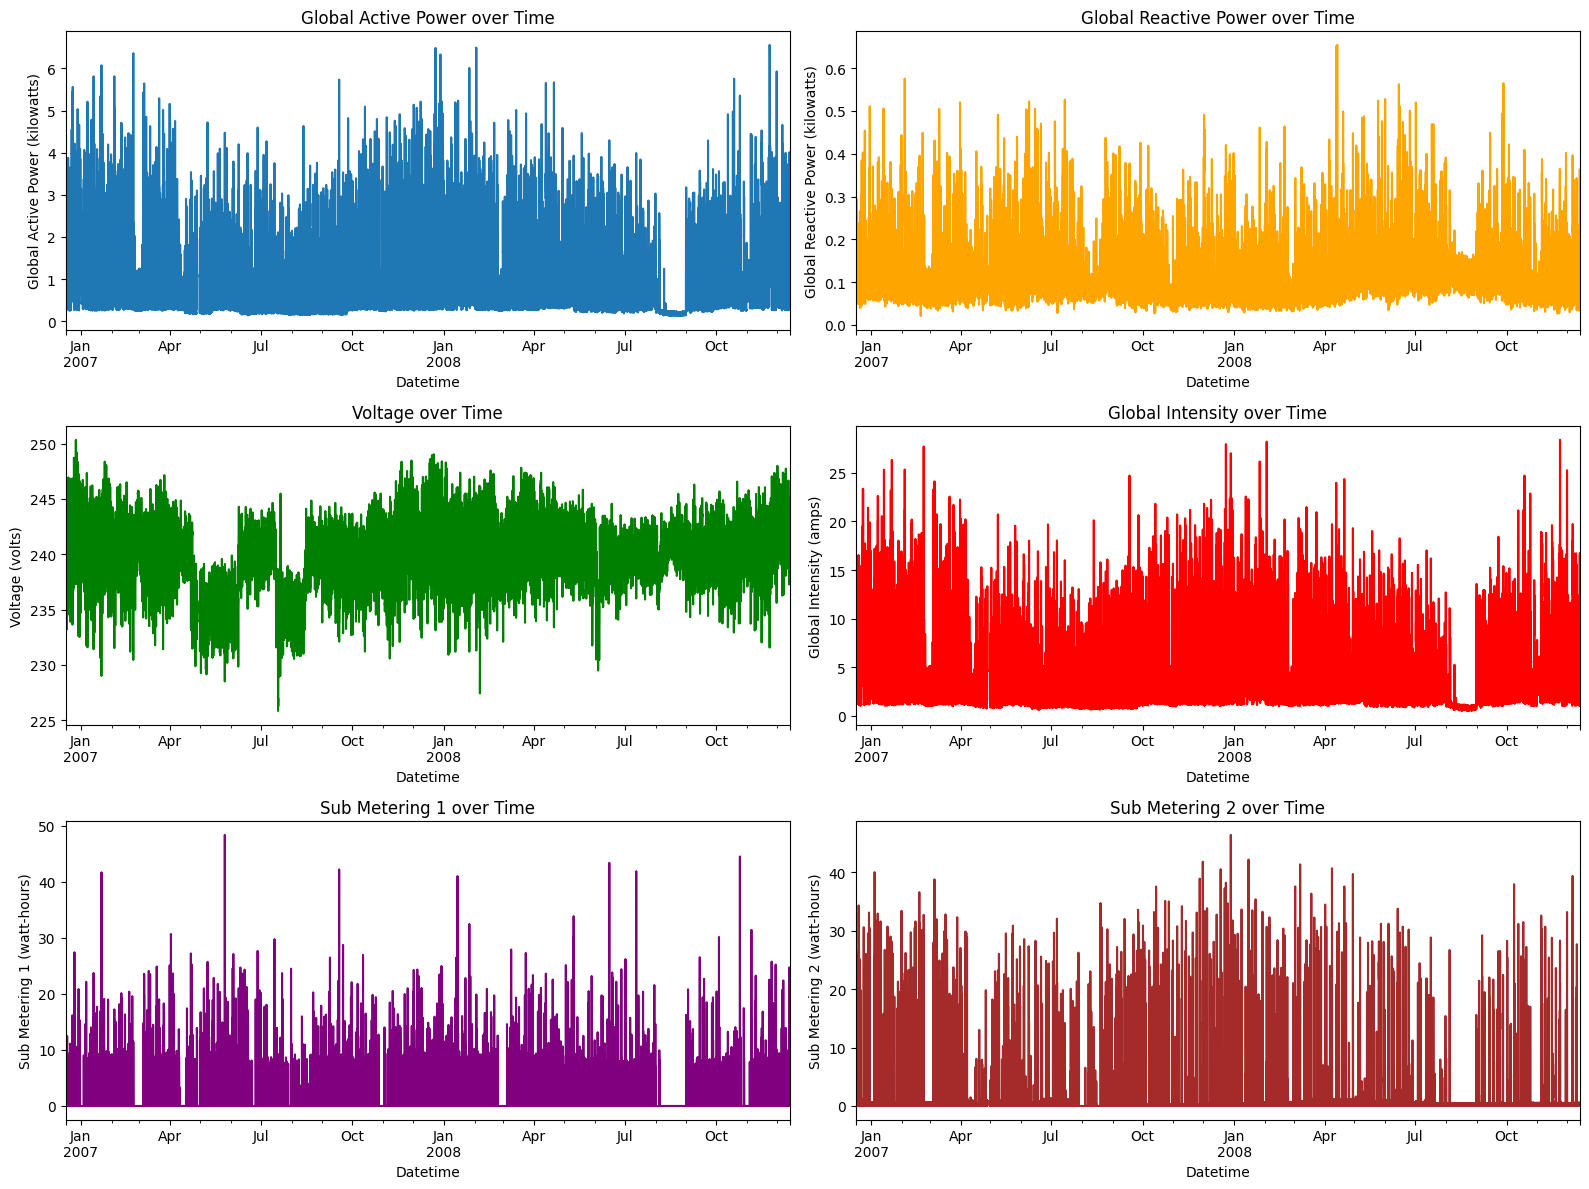

In [9]:
# Plotting time series data for different features
plt.figure(figsize=(16, 12))

# Plot Global Active Power over time
plt.subplot(3, 2, 1)
df_resampled['Global_active_power'].plot(title='Global Active Power over Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')

# Plot Global Reactive Power over time
plt.subplot(3, 2, 2)
df_resampled['Global_reactive_power'].plot(title='Global Reactive Power over Time', color='orange')
plt.xlabel('Datetime')
plt.ylabel('Global Reactive Power (kilowatts)')

# Plot Voltage over time
plt.subplot(3, 2, 3)
df_resampled['Voltage'].plot(title='Voltage over Time', color='green')
plt.xlabel('Datetime')
plt.ylabel('Voltage (volts)')

# Plot Global Intensity over time
plt.subplot(3, 2, 4)
df_resampled['Global_intensity'].plot(title='Global Intensity over Time', color='red')
plt.xlabel('Datetime')
plt.ylabel('Global Intensity (amps)')

# Plot Sub Metering 1 over time
plt.subplot(3, 2, 5)
df_resampled['Sub_metering_1'].plot(title='Sub Metering 1 over Time', color='purple')
plt.xlabel('Datetime')
plt.ylabel('Sub Metering 1 (watt-hours)')

# Plot Sub Metering 2 over time
plt.subplot(3, 2, 6)
df_resampled['Sub_metering_2'].plot(title='Sub Metering 2 over Time', color='brown')
plt.xlabel('Datetime')
plt.ylabel('Sub Metering 2 (watt-hours)')

plt.tight_layout()
plt.show()

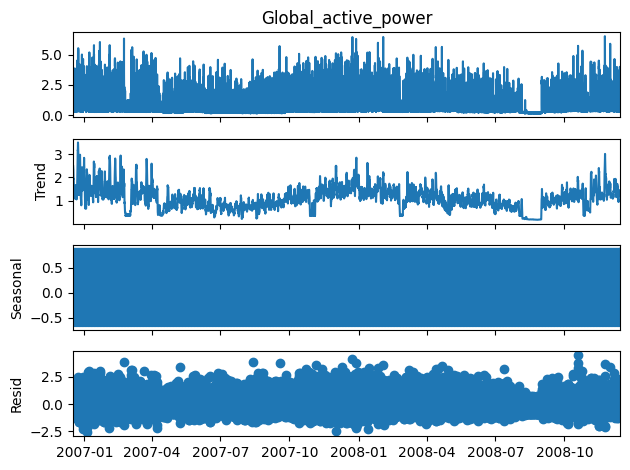

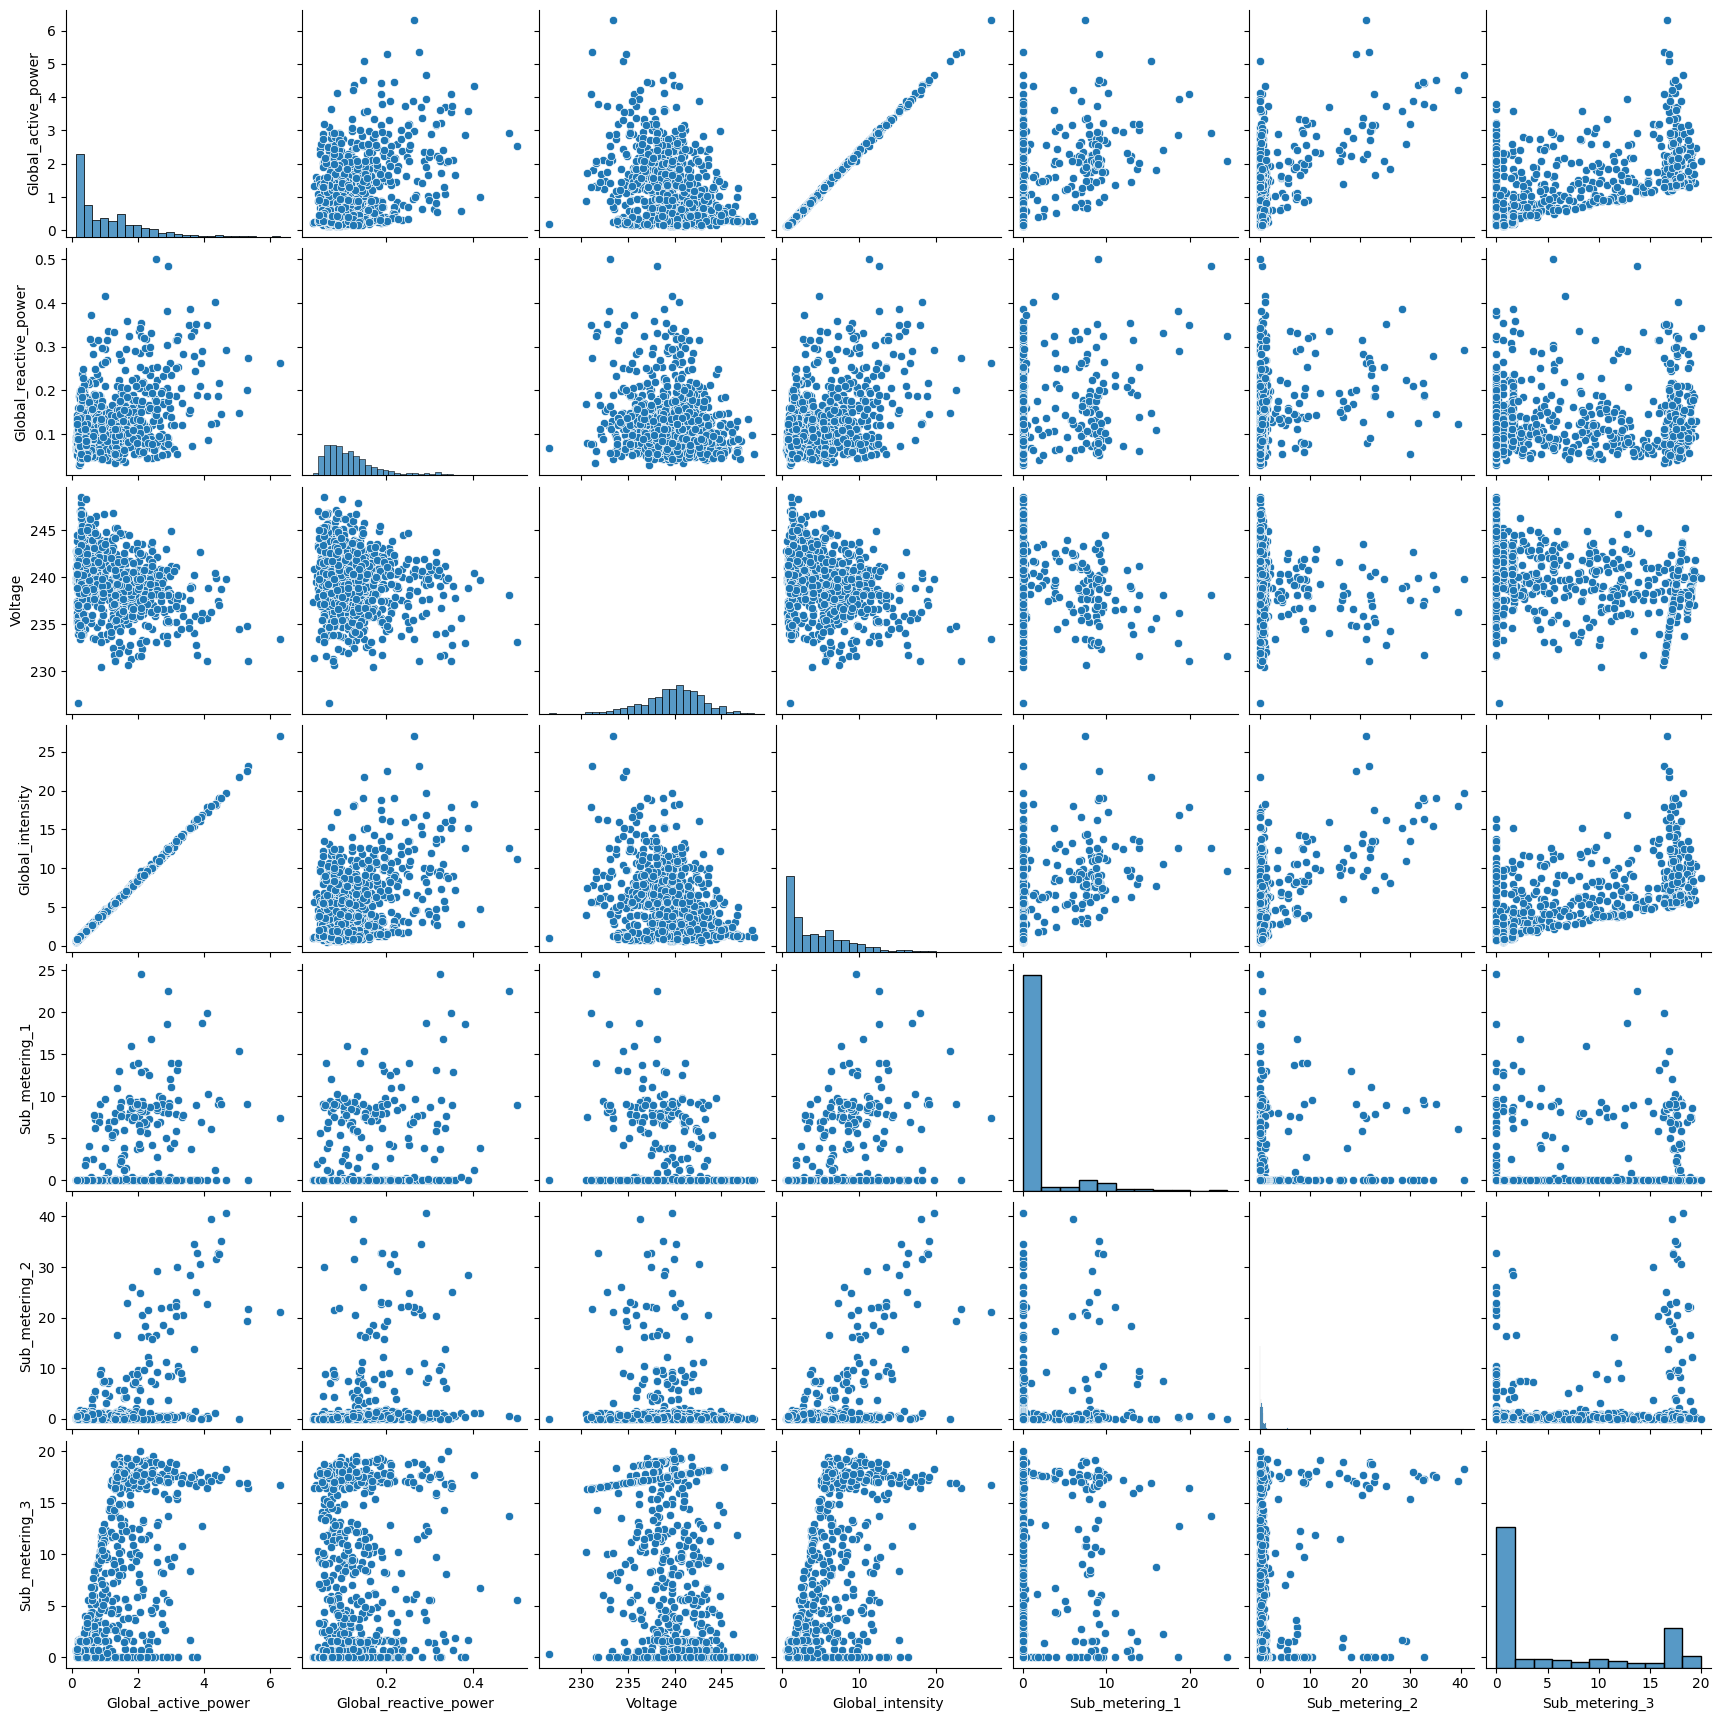

In [10]:

# Decompose time series to observe seasonality, trend, and residuals
result = seasonal_decompose(df_resampled['Global_active_power'], model='additive', period=24)
result.plot()
plt.show()

# Plot pairplot for relationships between different features
sns.pairplot(df_resampled.sample(1000))  # Sampling for better visualization performance
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

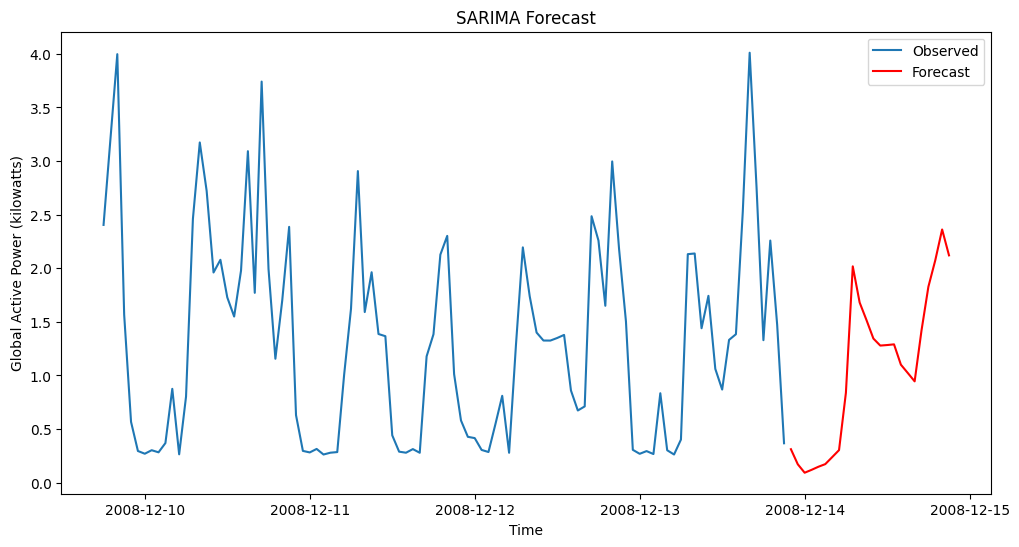

In [14]:
# Use a subset of the data for initial testing
data_subset = df_resampled['Global_active_power'].dropna().iloc[-1000:]

# Fit SARIMA model
sarima_model = SARIMAX(data_subset, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_result = sarima_model.fit()

# Forecast
forecast = sarima_result.forecast(steps=24)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(data_subset[-100:], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()


In [15]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [18]:
# Load the dataset
df = pd.read_csv('C:\\Users\\91875\\Jupyter Projects\\Electricity Consumption Prediction\\household_power_consumption.csv')

# Combine 'Date' and 'Time' into a single datetime column, specifying dayfirst=True
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Set the datetime column as the index
df.set_index('Datetime', inplace=True)

# Drop the original 'Date' and 'Time' columns as they are no longer needed
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert all columns to numeric, coercing errors to NaNs
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Resample data to hourly mean consumption
df_resampled = df.resample('h').mean()

# Handle missing values using forward fill
df_resampled.ffill(inplace=True)


# Create new features
# Hour of the day
df_resampled['hour'] = df_resampled.index.hour

# Day of the week
df_resampled['day_of_week'] = df_resampled.index.dayofweek

# Month of the year
df_resampled['month'] = df_resampled.index.month

# Day of the year
df_resampled['day_of_year'] = df_resampled.index.dayofyear

# Basic Statistics
print(df_resampled.describe())

# Check for missing values
print(df_resampled.isnull().sum())


       Global_active_power  Global_reactive_power       Voltage  \
count         17477.000000           17477.000000  17477.000000   
mean              1.108240               0.118377    239.938362   
std               0.966103               0.065144      3.058408   
min               0.124000               0.021033    225.834500   
25%               0.310400               0.075000    238.110667   
50%               0.779800               0.101867    240.186167   
75%               1.620033               0.140067    241.952667   
max               6.560533               0.654067    250.342500   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      17477.000000    17477.000000    17477.000000    17477.000000   
mean           4.718414        1.172949        1.472825        5.914093   
std            4.060035        3.630769        4.636369        7.217047   
min            0.503333        0.000000        0.000000        0.000000   
25%            1.3766

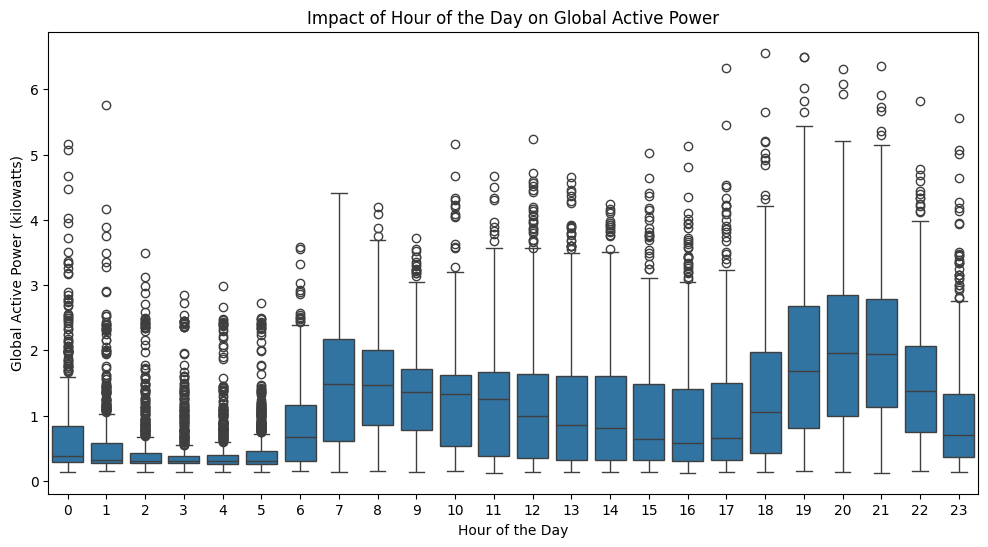

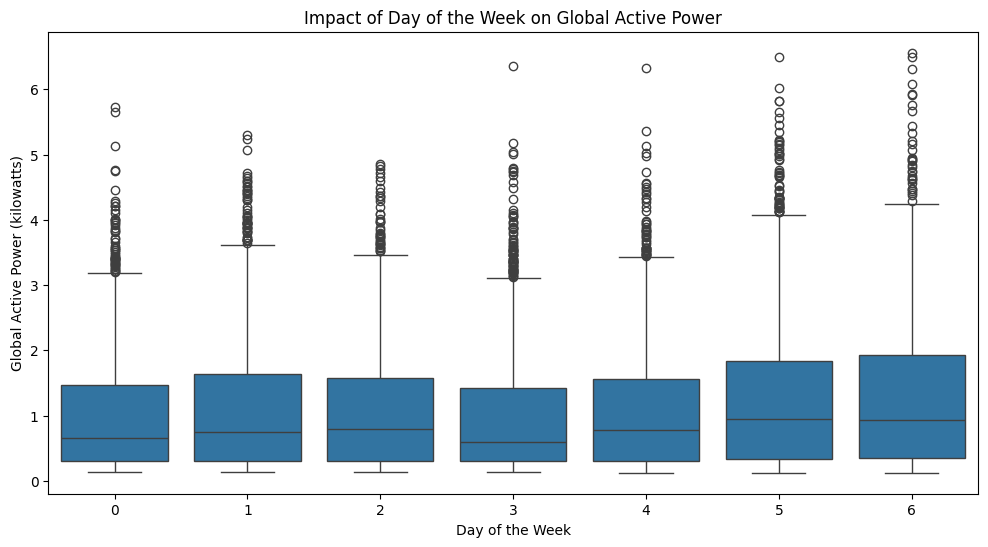

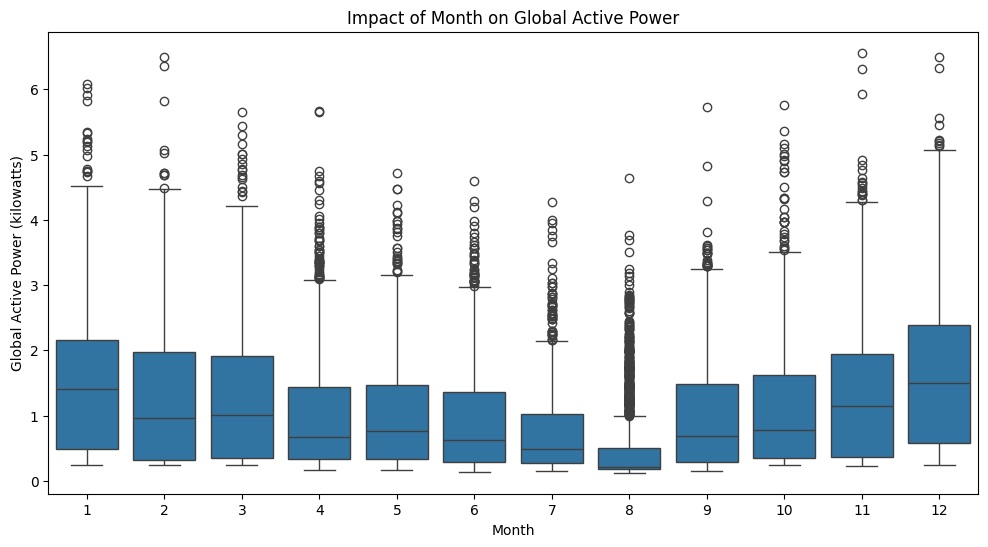

In [19]:
# hour of the day 
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='Global_active_power', data=df_resampled)
plt.title('Impact of Hour of the Day on Global Active Power')
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

#  day of the week 
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='Global_active_power', data=df_resampled)
plt.title('Impact of Day of the Week on Global Active Power')
plt.xlabel('Day of the Week')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

#  month 
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='Global_active_power', data=df_resampled)
plt.title('Impact of Month on Global Active Power')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

Mean Squared Error:  0.0003452453333616808
R-squared:  0.9996246246627166


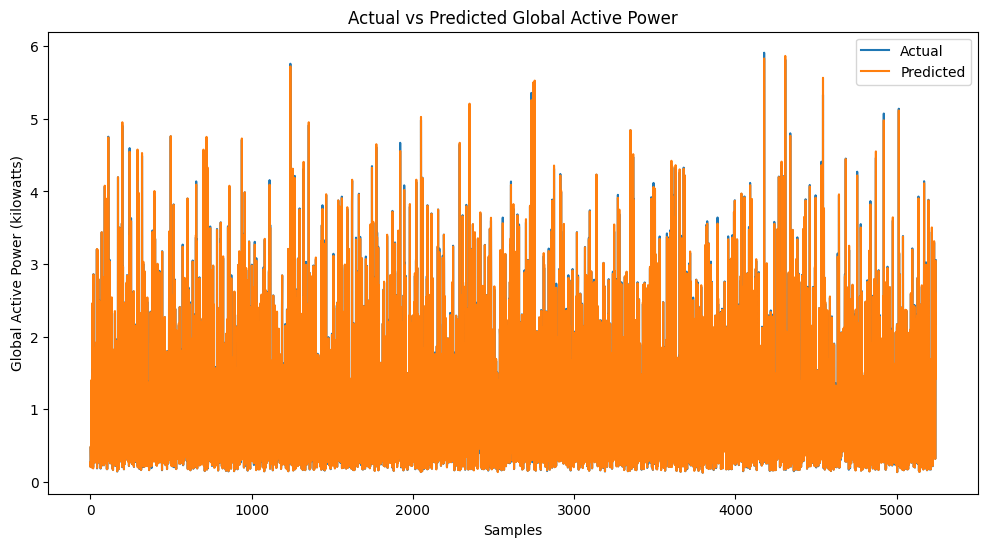

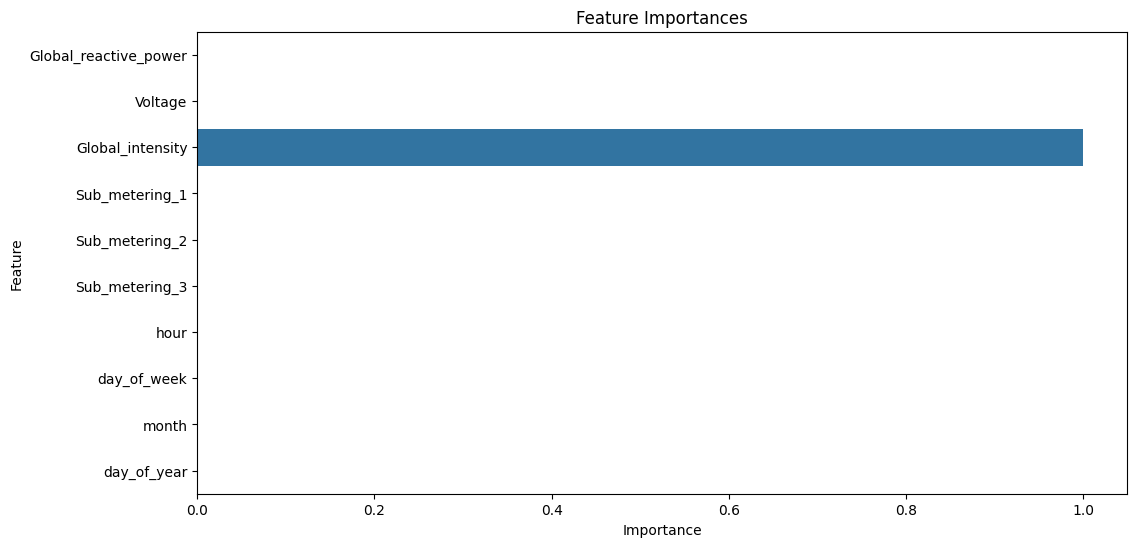

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('C:\\Users\\91875\\Jupyter Projects\\Electricity Consumption Prediction\\household_power_consumption.csv')

# Data preprocessing and feature engineering
# Combine 'Date' and 'Time' into a single datetime column, specifying dayfirst=True
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Set the datetime column as the index
df.set_index('Datetime', inplace=True)

# Drop the original 'Date' and 'Time' columns as they are no longer needed
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert all columns to numeric, coercing errors to NaNs
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Resample data to hourly mean consumption and handle missing values
df_resampled = df.resample('h').mean().ffill()

# Create new samples
df_resampled['hour'] = df_resampled.index.hour
df_resampled['day_of_week'] = df_resampled.index.dayofweek
df_resampled['month'] = df_resampled.index.month
df_resampled['day_of_year'] = df_resampled.index.dayofyear

# Define X and y
X = df_resampled[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'hour', 'day_of_week', 'month', 'day_of_year']]
y = df_resampled['Global_active_power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RandomForestRegressor for modeling
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Global Active Power')
plt.xlabel('Samples')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

# Plot feature importances 
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
